# [Inserte nombre de proyecto]

- Jorge Andres Mogotocoro Fajardo - 2160075
- 
- 

## **$X_0$** Imports:

In [0]:
library(reshape)
library(plyr)
library(magrittr) # Permite leer la función %>%
library(dplyr) # Contiene la función select
library(devtools)
library('SamplingUtil')
library(faraway)
library(corrplot)
library("dplyr")
library("ggpubr")
library("car")
library("Hmisc")

In [0]:
install.packages("reshape")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages("devtools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘brew’, ‘commonmark’, ‘praise’, ‘roxygen2’, ‘testthat’



In [0]:
install_github("DFJL/SamplingUtil")

✔  checking for file ‘/tmp/RtmpxDe4YQ/remotes894d5ae9a0/DFJL-SamplingUtil-e08400c/DESCRIPTION’
─  preparing ‘SamplingUtil’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘SamplingUtil_0.1.9.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages("faraway")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’



In [13]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’



In [0]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’



In [16]:
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’



## **$X_1$**: Cargando datos:

In [52]:
d <- read.csv("https://raw.githubusercontent.com/Jamf05/20191-ai-class-project/master/export_dataframe.csv", fileEncoding = "UTF-8")
dim(d)

[1] 4920   12

In [53]:
head(d)

country,year,sex,age,suicides_no,population,suicides.100k_pop,country.year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>
32,1985,0,5,202,363000,55.65,Argentina1985,0.694,88.417,3264,0
32,1985,0,4,485,1997000,24.29,Argentina1985,0.694,88.417,3264,0
32,1985,0,3,414,3346300,12.37,Argentina1985,0.694,88.417,3264,1
32,1985,1,4,210,2304000,9.11,Argentina1985,0.694,88.417,3264,0
32,1985,0,2,177,2234200,7.92,Argentina1985,0.694,88.417,3264,2
32,1985,1,5,41,537000,7.64,Argentina1985,0.694,88.417,3264,0


In [54]:
tail(d)

,country,year,sex,age,suicides_no,population,suicides.100k_pop,country.year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>
4915,860,2014,1,2,162,2735238,5.92,Uzbekistan2014,0.675,63.067,2309,4
4916,860,2014,1,3,107,3620833,2.96,Uzbekistan2014,0.675,63.067,2309,3
4917,860,2014,1,5,9,348465,2.58,Uzbekistan2014,0.675,63.067,2309,1
4918,860,2014,0,0,60,2762158,2.17,Uzbekistan2014,0.675,63.067,2309,5
4919,860,2014,1,0,44,2631600,1.67,Uzbekistan2014,0.675,63.067,2309,5
4920,860,2014,1,4,21,1438935,1.46,Uzbekistan2014,0.675,63.067,2309,2


In [55]:
summary(d)

    country           year           sex           age       suicides_no     
 Min.   : 32.0   Min.   :1985   Min.   :0.0   Min.   :0.0   Min.   :    1.0  
 1st Qu.:124.0   1st Qu.:1994   1st Qu.:0.0   1st Qu.:1.0   1st Qu.:   64.0  
 Median :276.0   Median :2001   Median :0.5   Median :2.5   Median :  234.0  
 Mean   :384.4   Mean   :2001   Mean   :0.5   Mean   :2.5   Mean   :  758.2  
 3rd Qu.:616.0   3rd Qu.:2008   3rd Qu.:1.0   3rd Qu.:4.0   3rd Qu.:  843.0  
 Max.   :860.0   Max.   :2015   Max.   :1.0   Max.   :5.0   Max.   :11767.0  
                                                                             
   population       suicides.100k_pop        country.year   HDI_for_year   
 Min.   :   40000   Min.   :  0.060   Argentina1985:  12   Min.   :0.5760  
 1st Qu.: 1474379   1st Qu.:  2.720   Argentina1986:  12   1st Qu.:0.7130  
 Median : 3392979   Median :  8.605   Argentina1987:  12   Median :0.7710  
 Mean   : 5923827   Mean   : 15.855   Argentina1988:  12   Mean   :0.777

In [10]:
index <- c(0,1,2,3,4,5,6,9,11,12)
head(d[index])

country,year,sex,age,suicides_no,population,HDI_for_year,gdp_per_capita,generation
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
32,1985,0,5,202,363000,0.694,3264,0
32,1985,0,4,485,1997000,0.694,3264,0
32,1985,0,3,414,3346300,0.694,3264,1
32,1985,1,4,210,2304000,0.694,3264,0
32,1985,0,2,177,2234200,0.694,3264,2
32,1985,1,5,41,537000,0.694,3264,0


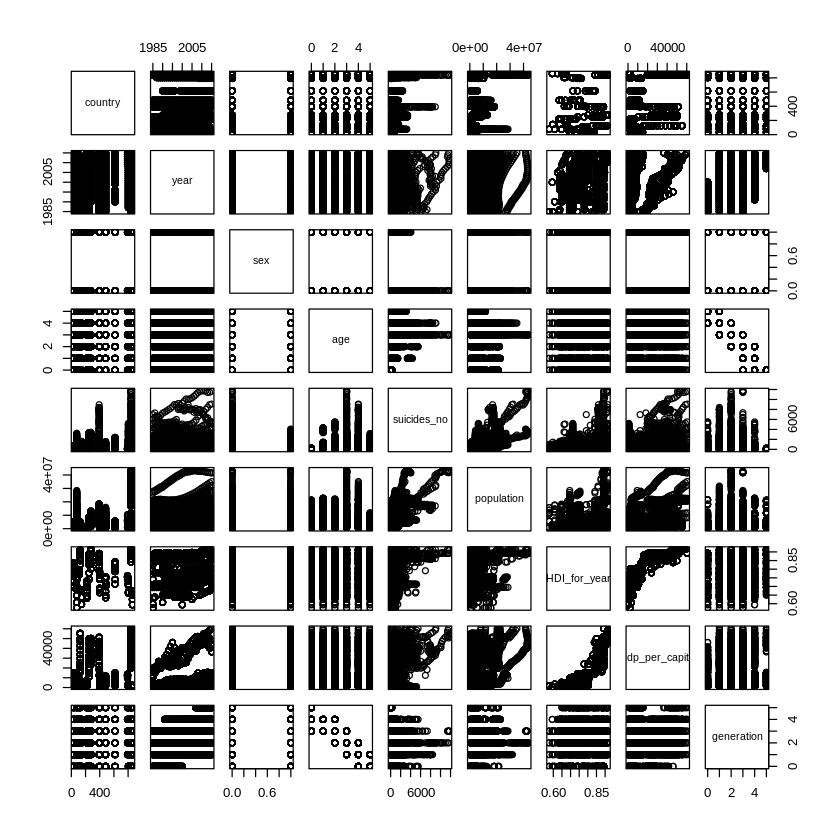

In [11]:
plot(d[,index])

## **$X_3$:** Analisis de correlaciones (general)

Analisis realizado para todos los paises.

In [14]:
library(corrplot)
cor(d[,index])

corrplot 0.84 loaded


,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_per_capita,generation
country,1.00000000,0.07674988,0.00000000,0.0000000,0.23781403,0.26250713,-0.03752138,0.03082279,0.02831786
year,0.07674988,1.00000000,0.00000000,0.0000000,0.01495333,0.05153174,0.15250637,0.28180974,0.34951469
sex,0.00000000,0.00000000,1.00000000,0.0000000,-0.29356789,0.01961313,0.00000000,0.00000000,0.00000000
age,0.00000000,0.00000000,0.00000000,1.0000000,0.17455697,-0.11394877,0.00000000,0.00000000,-0.91011884
suicides_no,0.23781403,0.01495333,-0.29356789,0.1745570,1.00000000,0.61615705,0.34148643,0.39665462,-0.15238051
population,0.26250713,0.05153174,0.01961313,-0.1139488,0.61615705,1.00000000,0.31332421,0.43359734,0.11994794
HDI_for_year,-0.03752138,0.15250637,0.00000000,0.0000000,0.34148643,0.31332421,1.00000000,0.84893713,0.05807671
gdp_per_capita,0.03082279,0.28180974,0.00000000,0.0000000,0.39665462,0.43359734,0.84893713,1.00000000,0.09855604
generation,0.02831786,0.34951469,0.00000000,-0.9101188,-0.15238051,0.11994794,0.05807671,0.09855604,1.00000000


In [21]:
library("Hmisc")
rcorr(as.matrix(d[,index]))

               country year   sex   age suicides_no population HDI_for_year
country           1.00 0.08  0.00  0.00        0.24       0.26        -0.04
year              0.08 1.00  0.00  0.00        0.01       0.05         0.15
sex               0.00 0.00  1.00  0.00       -0.29       0.02         0.00
age               0.00 0.00  0.00  1.00        0.17      -0.11         0.00
suicides_no       0.24 0.01 -0.29  0.17        1.00       0.62         0.34
population        0.26 0.05  0.02 -0.11        0.62       1.00         0.31
HDI_for_year     -0.04 0.15  0.00  0.00        0.34       0.31         1.00
gdp_per_capita    0.03 0.28  0.00  0.00        0.40       0.43         0.85
generation        0.03 0.35  0.00 -0.91       -0.15       0.12         0.06
               gdp_per_capita generation
country                  0.03       0.03
year                     0.28       0.35
sex                      0.00       0.00
age                      0.00      -0.91
suicides_no              0.40      

In [22]:
M<-cor(d[,index])
head(round(M,2))

,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_per_capita,generation
country,1.00,0.08,0.00,0.00,0.24,0.26,-0.04,0.03,0.03
year,0.08,1.00,0.00,0.00,0.01,0.05,0.15,0.28,0.35
sex,0.00,0.00,1.00,0.00,-0.29,0.02,0.00,0.00,0.00
age,0.00,0.00,0.00,1.00,0.17,-0.11,0.00,0.00,-0.91
suicides_no,0.24,0.01,-0.29,0.17,1.00,0.62,0.34,0.40,-0.15
population,0.26,0.05,0.02,-0.11,0.62,1.00,0.31,0.43,0.12


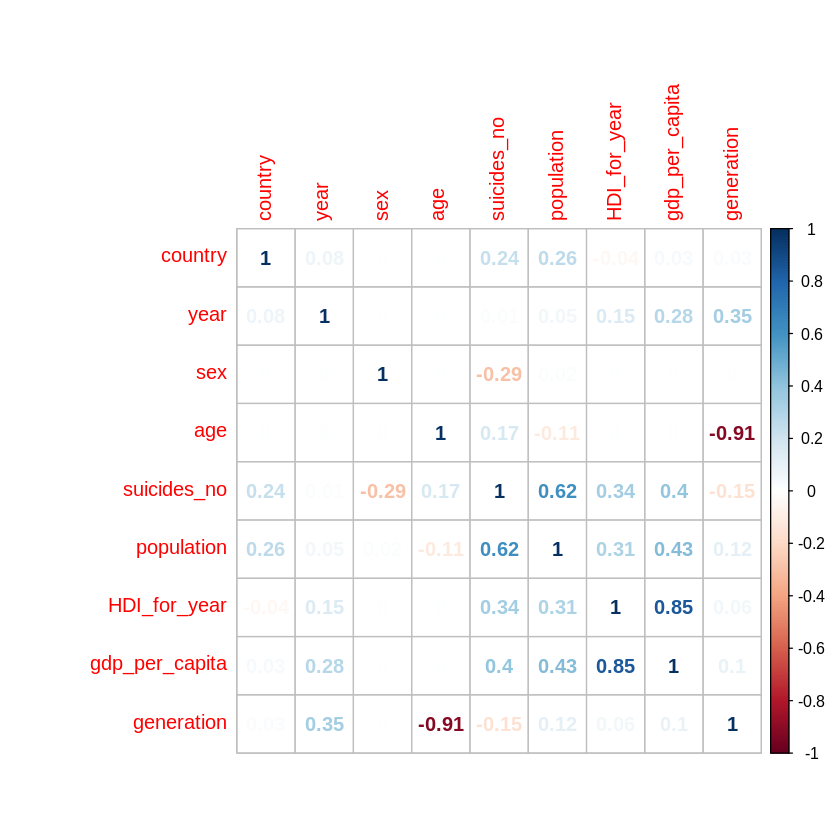

In [23]:
corrplot(M, method="number")

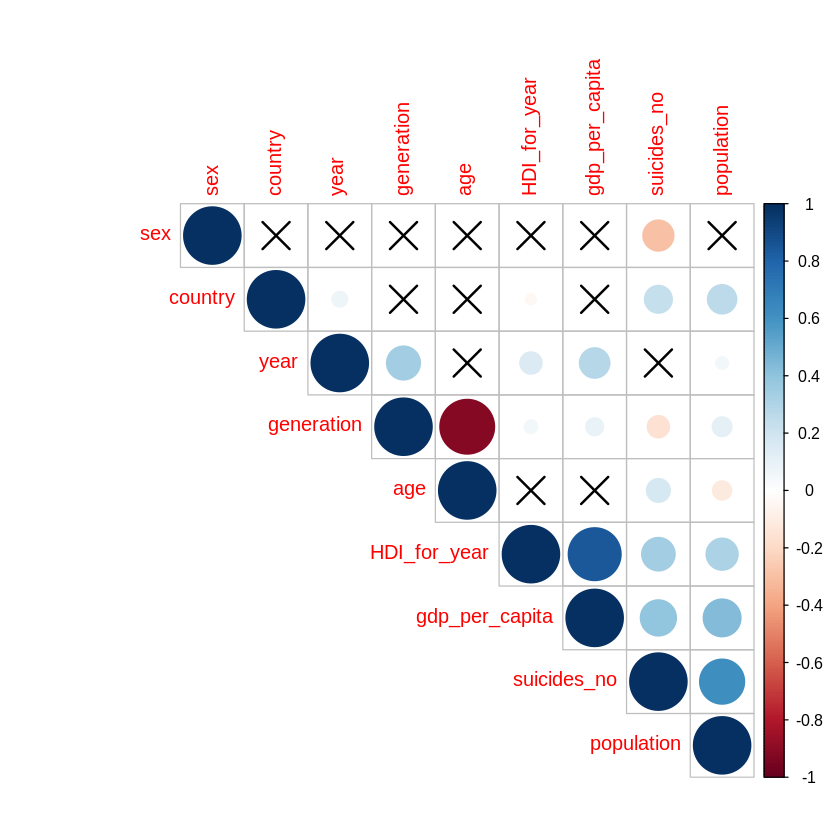

In [24]:
library("Hmisc")
cor_5 <- rcorr(as.matrix(d[,index]))
M <- cor_5$r
p_mat <- cor_5$P
corrplot(M, type = "upper", order = "hclust", p.mat = p_mat, sig.level = 0.01)

## $X_2$. Analisis de correlaciones (Colombia):

Analisis tomando en consideracion pais por pais.

In [0]:
d_CO <- read.csv("https://raw.githubusercontent.com/Jamf05/20191-ai-class-project/master/export_dataframe_CO.csv", fileEncoding = "UTF-8")

In [37]:
head(d_CO)

year,sex,age,suicides_no,population,suicides.100k_pop,country.year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
<int>,<int>,<int>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>
1985,0,5,21,123400,17.02,Colombia1985,0.573,34.894,1393,0
1985,0,4,113,1015200,11.13,Colombia1985,0.573,34.894,1393,0
1985,0,2,193,2323700,8.31,Colombia1985,0.573,34.894,1393,2
1985,0,1,256,3190200,8.02,Colombia1985,0.573,34.894,1393,3
1985,0,3,188,2451100,7.67,Colombia1985,0.573,34.894,1393,1
1985,1,1,117,3140700,3.73,Colombia1985,0.573,34.894,1393,3


In [47]:
index <- c(0,1,2,3,4,5,8,9,11)
head(d_CO[,index])

year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year,generation
<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1985,0,5,21,123400,0.573,34.894,0
1985,0,4,113,1015200,0.573,34.894,0
1985,0,2,193,2323700,0.573,34.894,2
1985,0,1,256,3190200,0.573,34.894,3
1985,0,3,188,2451100,0.573,34.894,1
1985,1,1,117,3140700,0.573,34.894,3


In [48]:
M<-cor(d_CO[,index])
head(round(M,2))

,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year,generation
year,1.00,0.00,0.00,0.26,0.30,0.63,0.91,0.37
sex,0.00,1.00,0.00,-0.52,0.03,0.00,0.00,0.00
age,0.00,0.00,1.00,-0.18,-0.73,0.00,0.00,-0.90
suicides_no,0.26,-0.52,-0.18,1.00,0.41,0.14,0.19,0.28
population,0.30,0.03,-0.73,0.41,1.00,0.19,0.27,0.78
HDI_for_year,0.63,0.00,0.00,0.14,0.19,1.00,0.67,0.25


Code without visible output:

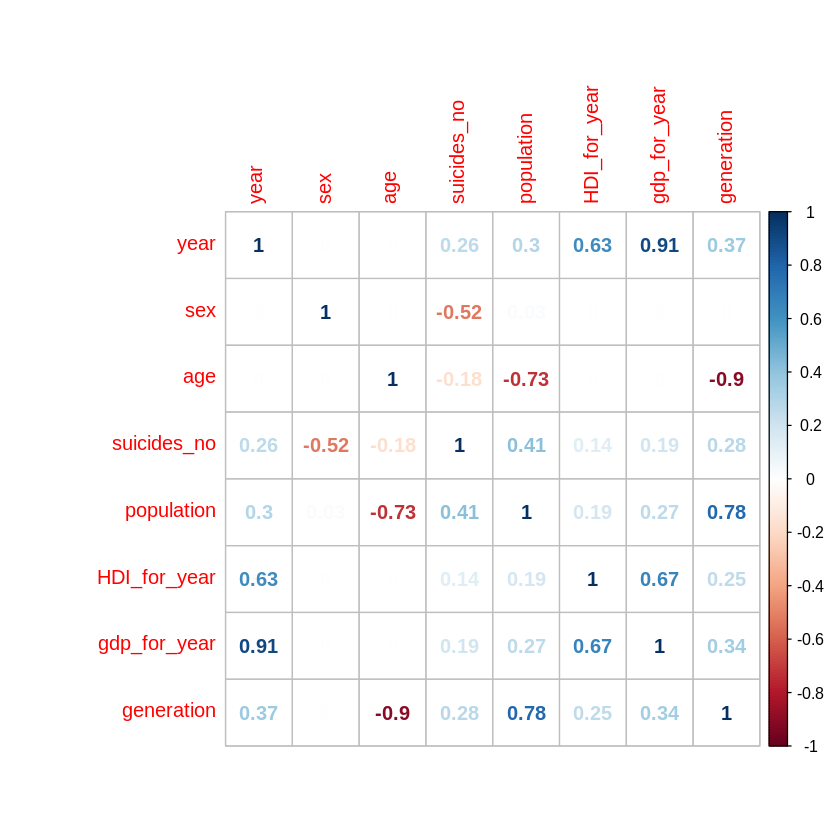

In [49]:
library("corrplot")
corrplot(M, method="number")

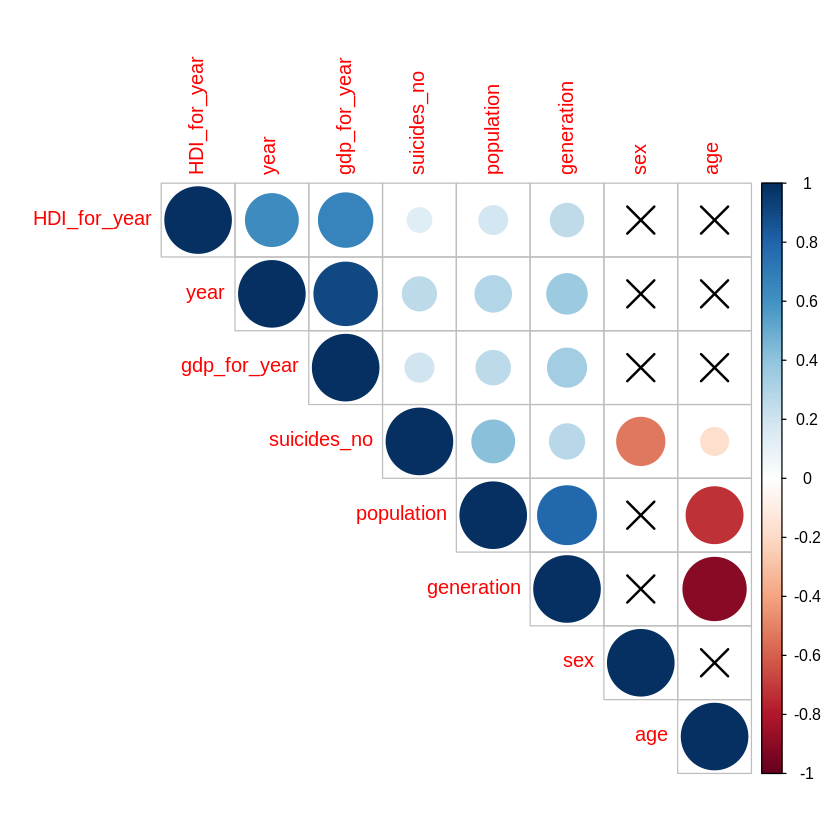

In [51]:
library("Hmisc")
cor_5 <- rcorr(as.matrix(d_CO[,index]))
M <- cor_5$r
p_mat <- cor_5$P
corrplot(M, type = "upper", order = "hclust", p.mat = p_mat, sig.level = 0.01)